<a href="https://colab.research.google.com/github/rootprime/ANN/blob/main/Airlines_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is a Python script for time series forecasting using a GRU (Gated Recurrent Unit) neural network model. Here's a breakdown of what each part of the code does:

1. **Importing Libraries**:
   - `numpy` (as `np`): For numerical operations.
   - `pandas` (as `pd`): For data manipulation and analysis.
   - `matplotlib.pyplot` (as `plt`): For data visualization.
   - `MinMaxScaler` from `sklearn.preprocessing`: For scaling data.
   - `Sequential`, `Dense`, `GRU`, and `Dropout` from `tensorflow.keras.models` and `tensorflow.keras.layers`: For building the neural network model.

2. **Loading and Preprocessing Data**:
   - Reads the dataset from an Excel file called 'airline-passengers.xlsx'.
   - Plots the time series data of international airline passengers.
   - Reshapes and scales the data using `MinMaxScaler` to be between 0 and 1.
   - Splits the data into training and testing sets.

3. **Creating Dataset**:
   - Defines a function `create_dataset` to create input-output pairs for the model.
   - Creates input sequences and their corresponding output values with a given window size.

4. **Building the Neural Network Model**:
   - Creates a sequential model using `Sequential`.
   - Adds four GRU layers with dropout regularization to prevent overfitting.
   - The GRU layers have increasing numbers of units and use ReLU activation functions.
   - The last layer is a fully connected (`Dense`) layer with one unit.
   - Compiles the model using the Adam optimizer and mean squared error loss function.

5. **Training the Model**:
   - Fits the model to the training data for a specified number of epochs and batch size.
   - The training loss history is stored for later visualization.

6. **Plotting Training Loss**:
   - Plots the training loss over epochs to visualize the model's training progress.

7. **Making Predictions**:
   - Uses the trained model to predict values for both the training and testing data.
   - Inverse scales the predicted values back to their original scale.

8. **Plotting Predictions**:
   - Plots the actual and predicted values of the testing data to visualize the model's performance.

Overall, this code demonstrates the process of building, training, and evaluating a GRU-based neural network model for time series forecasting.

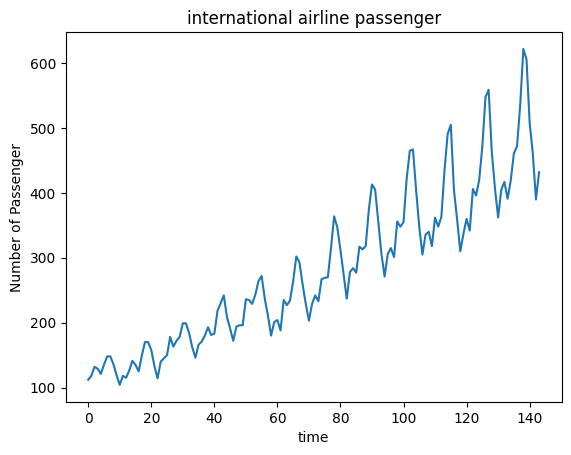

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 30)             2970      
                                                                 
 dropout (Dropout)           (None, 1, 30)             0         
                                                                 
 gru_1 (GRU)                 (None, 1, 40)             8640      
                                                                 
 dropout_1 (Dropout)         (None, 1, 40)             0         
                                                                 
 gru_2 (GRU)                 (None, 1, 50)             13800     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 gru_3 (GRU)                 (None, 70)                2

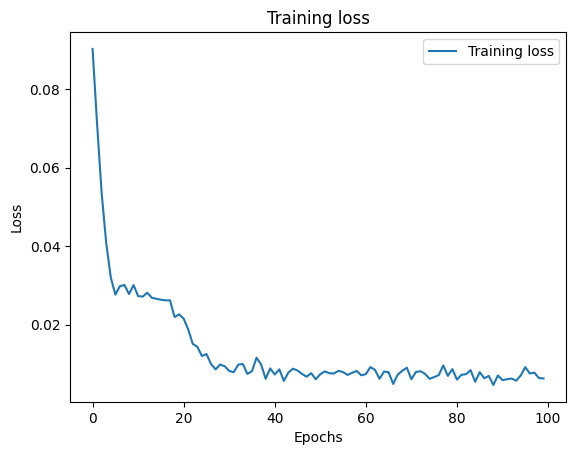

1/1 [==============================] - 0s 18ms/step


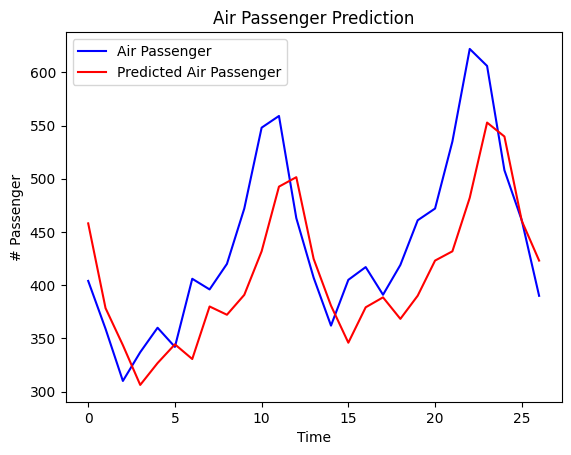

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

# Load the dataset
data = pd.read_excel('airline-passengers.xlsx')
data.head()

plt.plot(data.iloc[:,1].values)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

data = data['Passengers'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 1

X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()

model.add(GRU(units = 30,activation='relu',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

model.add(GRU(units = 40,activation='relu', return_sequences = True))
model.add(Dropout(rate = 0.3))

model.add(GRU(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(rate = 0.4))

model.add(GRU(units = 70, return_sequences = False))
model.add(Dropout(rate = 0.5))

model.add(Dense(units = 1))

model.summary()

model.compile(optimizer='adam',
              loss='mean_squared_error')

history = model.fit(X_train, y_train,
                    epochs=1000,
                    batch_size=32)

plt.plot(history.history['loss'], label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), color='blue', label='Air Passenger')
plt.plot(scaler.inverse_transform(testPredict.reshape(-1,1)), color='red', label='Predicted Air Passenger')
plt.title('Air Passenger Prediction')
plt.xlabel('Time')
plt.ylabel('# Passenger')
plt.legend()
plt.show()
